In [51]:
import pandas as pd
import wikipedia
articles=[ 'European Union','Germany','Iran','Italian food','France', 'Spanish song', 'Pop songs', 'Violin','Piano',
          'Guitar',' Setar', 'Iranian poets','Seahorse', 'Giraffe', 'Rhino', 'Psycho', 'AIDS', 'Schizophrenia',
          'The hot weather of Paris', 'Persian the literature',  'Learn multiple languages', 'Lifestyle business',
          'Concentration',"African Animals",'World famous songs','wake up early'
          ,'Oil of countries','Rudolf Diesel'
          ]
wiki_lst=[]
title=[]
for article in articles:
    print("loading content: ",article)
    wiki_lst.append(wikipedia.page(article).content)
    title.append(article)
print("examine content")
wiki_lst

loading content:  European Union
loading content:  Germany
loading content:  Iran
loading content:  Italian food
loading content:  France
loading content:  Spanish song
loading content:  Pop songs
loading content:  Violin
loading content:  Piano
loading content:  Guitar
loading content:   Setar
loading content:  Iranian poets
loading content:  Seahorse
loading content:  Giraffe
loading content:  Rhino
loading content:  Psycho
loading content:  AIDS
loading content:  Schizophrenia
loading content:  The hot weather of Paris
loading content:  Persian the literature
loading content:  Learn multiple languages
loading content:  Lifestyle business
loading content:  Concentration
loading content:  African Animals
loading content:  World famous songs
loading content:  wake up early
loading content:  Oil of countries
loading content:  Rudolf Diesel
examine content


['The European Union (EU) is a political and economic union of 27 member states that are located primarily in Europe. The union has a total area of 4,233,255.3 km2 (1,634,469.0 sq mi) and an estimated total population of about 447 million. An internal single market has been established through a standardised system of laws that apply in all member states in those matters, and only those matters, where the states have agreed to act as one. EU policies aim to ensure the free movement of people, goods, services and capital within the internal market; enact legislation in justice and home affairs; and maintain common policies on trade, agriculture, fisheries and regional development. Passport controls have been abolished for travel within the Schengen Area. The eurozone is a monetary union established in 1999, coming into full force in 2002, that is composed of the 19 EU member states that use the euro currency. The EU has often been described as a sui generis political entity (without pre

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(wiki_lst)

In [56]:
print(X[0,])

  (0, 13406)	0.0015850513989957799
  (0, 12968)	0.001953610059476498
  (0, 2021)	0.0017380170637792576
  (0, 10070)	0.0012874937503897148
  (0, 8886)	0.0017380170637792576
  (0, 4778)	0.001953610059476498
  (0, 1833)	0.0015850513989957799
  (0, 15210)	0.001466402011572984
  (0, 10011)	0.0012874937503897148
  (0, 7423)	0.0031701027979915597
  (0, 4214)	0.0017380170637792576
  (0, 7312)	0.001466402011572984
  (0, 2023)	0.0017380170637792576
  (0, 9289)	0.0008479340780343432
  (0, 14513)	0.0017380170637792576
  (0, 20027)	0.0013694584032985394
  (0, 11132)	0.0005697137514233399
  (0, 15414)	0.0009189350899089962
  (0, 2904)	0.0013694584032985394
  (0, 4256)	0.001466402011572984
  (0, 15541)	0.0005317177517522115
  (0, 3303)	0.001953610059476498
  (0, 13667)	0.0013694584032985394
  (0, 7135)	0.001953610059476498
  (0, 12540)	0.0017380170637792576
  :	:
  (0, 861)	0.003907220118952996
  (0, 10625)	0.0012874937503897148
  (0, 614)	0.001953610059476498
  (0, 595)	0.0031701027979915597
  (0, 2

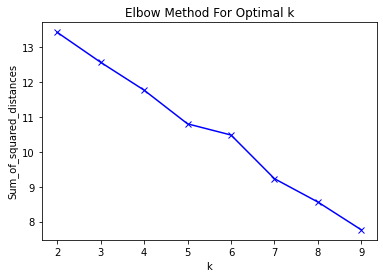

In [57]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [78]:
true_k =3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                       title  cluster
0             European Union        0
25             wake up early        0
24        World famous songs        0
23           African Animals        0
22             Concentration        0
20  Learn multiple languages        0
18  The hot weather of Paris        0
17             Schizophrenia        0
16                      AIDS        0
15                    Psycho        0
14                     Rhino        0
26          Oil of countries        0
13                   Giraffe        0
10                     Setar        0
9                     Guitar        0
8                      Piano        0
7                     Violin        0
6                  Pop songs        0
5               Spanish song        0
4                     France        0
3               Italian food        0
2                       Iran        0
1                    Germany        0
12                  Seahorse        0
27             Rudolf Diesel        0
21        Li

Cluster: 0
Titles
          European Union
                 Germany
                    Iran
            Italian food
                  France
            Spanish song
               Pop songs
                  Violin
                   Piano
                  Guitar
                   Setar
                Seahorse
                 Giraffe
                   Rhino
                  Psycho
                    AIDS
           Schizophrenia
The hot weather of Paris
Learn multiple languages
           Concentration
         African Animals
      World famous songs
           wake up early
        Oil of countries
           Rudolf Diesel


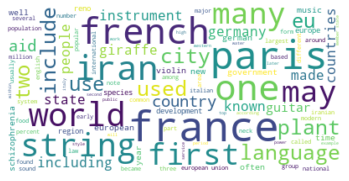

Cluster: 1
Titles
Lifestyle business


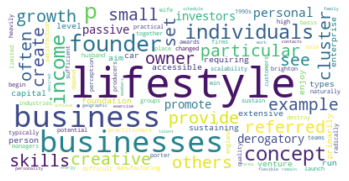

Cluster: 2
Titles
         Iranian poets
Persian the literature


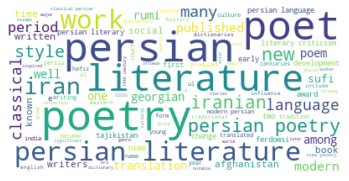

In [79]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()